# **Classification Performance Metrics** 

In the classification Metrics primarily below mentioned metrics are used: <br>

  1. Accuracy
  2. Recall
  3. Precision
  4. Confusion Matrix
  5. F1 Score

### Imported Libraries

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Collection Libraries
from collections import Counter

# Preprocessing Libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Algorithm Libraries
from sklearn.linear_model import LogisticRegression

# Metrics Libraries
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,precision_score,roc_auc_score,recall_score
from sklearn.metrics import precision_recall_curve,plot_confusion_matrix,roc_auc_score,auc


In [2]:
# Create a dataset of 10000 dataset
X,y = make_classification(n_samples=10000,random_state=32)

In [3]:
X.shape,y.shape

((10000, 20), (10000,))

In [4]:
# Dataset is almost balanced
Counter(y)

Counter({0: 4998, 1: 5002})

In [5]:
# Splitting the dataset
X_tr , X_te, y_tr,y_te = train_test_split(X,y,test_size = .2 , random_state=34)

In [6]:
X_tr.shape , X_te.shape , y_tr.shape ,y_te.shape 

((8000, 20), (2000, 20), (8000,), (2000,))

#### **Training and validating the Logistic Regression Model**

In [7]:
lr = LogisticRegression()

In [8]:
lr.fit(X_tr,y_tr)

LogisticRegression()

**predict_proba()** <br>
predict() is used to predict the actual class (in your case one of 0, 1, or 2).<br>
predict_proba() is used to predict the class probabilities <br>
Example :<br>
predict() would output class 0 since the class probability for 0 is 0.6.
[0.6, 0.2, 0.2] is the output of predict_proba that simply denotes that the class probability for classes 0, 1, and 2 are 0.6, 0.2, and 0.2 respectively.



In [9]:
yprob = lr.predict_proba(X_te)

In [10]:
yprob # first value in the array represent that probability of class 0 and 2nd represent the probablity of class 1.

array([[0.78857862, 0.21142138],
       [0.17489076, 0.82510924],
       [0.99832516, 0.00167484],
       ...,
       [0.76617271, 0.23382729],
       [0.93442134, 0.06557866],
       [0.0085638 , 0.9914362 ]])

Here we did the list comprehension and set the probability to 0.7 i.e. if probablity of postive class is less than 0.7 then it will be beloging to class 0 otherwise it will be class 1.<br>
Also yprediciton here is a list to we will convert into the numpy array.

In [11]:
yprediction = [0 if i<=0.7 else 1 for i in yprob[:,1] ]

In [12]:
# Getting the first 9 values
yprediction[:9]

[0, 1, 0, 0, 1, 0, 1, 1, 0]

In [13]:
type(yprediction)

list

In [14]:
yprediction = np.array(yprediction)

In [15]:
type(yprediction)

numpy.ndarray

In [16]:
yprediction.shape

(2000,)

Other way to calculate the prediction is using predict() method where threshold is set to 0.5 

In [17]:
ypred = lr.predict(X_te)

In [18]:
type(ypred) # It is numpy array

numpy.ndarray

In [19]:
print(ypred.shape)
print(ypred)

(2000,)
[0 1 0 ... 0 0 1]


Now we have the ytest and ypred then we will go to checking preformance metrics

In [20]:
y_te.shape , ypred.shape

((2000,), (2000,))

## **Performace Metrics** 

#### **Confusion Matrix**

A confusion matrix is a summary of prediction results on a classification problem. <br>
It consist of 4 terms for a binary classification problem.<br>

**True Positive:**

Interpretation: You predicted positive and it’s true.

You predicted that a woman is pregnant and she actually is.

**True Negative:**

Interpretation: You predicted negative and it’s true.

You predicted that a man is not pregnant and he actually is not.

**False Positive: (Type 1 Error)**

Interpretation: You predicted positive and it’s false.

You predicted that a man is pregnant but he actually is not.

**False Negative: (Type 2 Error)**

Interpretation: You predicted negative and it’s false.

You predicted that a woman is not pregnant but she actually is.
<br>
All these values are represented in the matrix form.

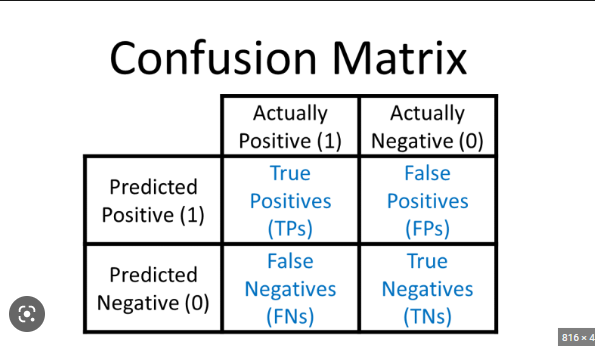

This is image that we have studied where actual values are on horizontal line and predicted values on the vertical line.
<br>
HOW TO READ THE CONFUSION MATRIX:<br>
There are 4 cell let say first cell as 11, second as 10, third as 01 and 4th as 00.<br>
Now say that for 11 cell --- > The predicted values is positive and actually it is positive. so it comes out as TP.<br>
for cell 10 ---- >  This is predicted as Positive but actually it is Negative means that it is FP(False Positive).<br>
for cell 01 --- > This is predicted as Negative but actually it is positive.that means it is False Negative FN. <br>
for cell 00 ----> This is predicted as Negative and actually it is Negative. so it will comes as True Negative(TN).

**But sklearn confusion matrix returns in different format**
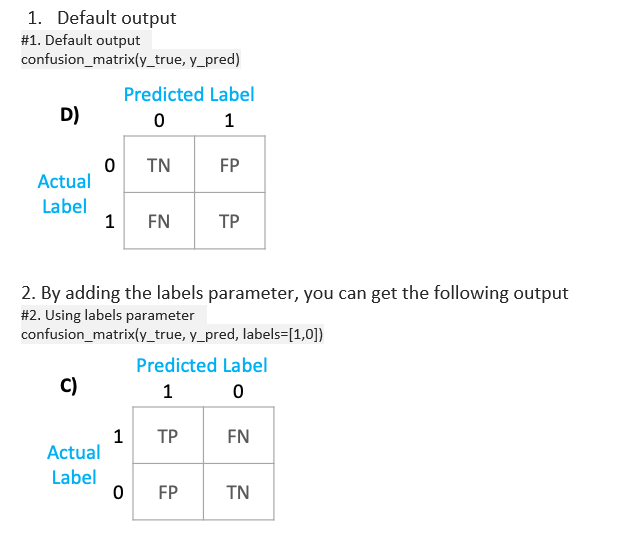

In [21]:
# printing the confusion matrix
confusion_matrix(y_te,ypred)

array([[915,  95],
       [ 95, 895]])

As the above matrix returns in default format so:<br>
1. TN = 915
2. FP = 95
3. FN = 95
4. TP = 895

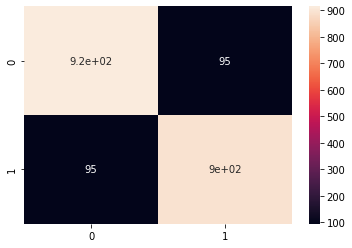

In [22]:
# Plotting the confusion matrix without the sklearn built_in plot_confusion_matrix option
sns.heatmap(confusion_matrix(y_te,ypred),annot = True)

**Plotting using the plot_confusion_matrix function**

In [23]:
y_te.shape, ypred.shape

((2000,), (2000,))

Plot_confusion_matrix accepts 3 parameter:<br>
a. estimator
b. Xtest
c. ytest<br>
Although this function have been depreceated

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


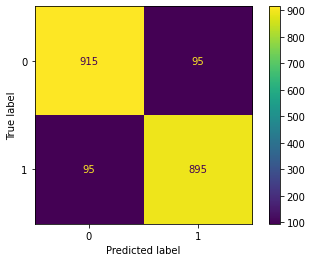

In [24]:
plot_confusion_matrix(lr, X_te, y_te)

**Plotting thorugh ConfusionMatrixDisplay**

In [25]:
ConfusionMatrixDisplay(confusion_matrix(y_te,ypred))

In [26]:
disp =ConfusionMatrixDisplay(confusion_matrix(y_te,ypred))

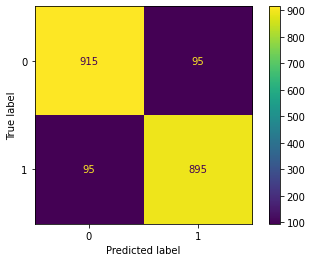

In [27]:
disp.plot()

#### **Accuracy** 

In [28]:
# Confusion Matrix Data
TN = 915
FP = 95
FN = 95
TP = 895

In [29]:
accuracy_score(y_te,ypred)

0.905

In [30]:
# Calculating accuracy score manually
# accuracy = TP + TN/ TP+TN+FP+FN
accuracy =(TP + TN)/ (TP+TN+FP+FN)
print(accuracy)

0.905


#### **Precision** 

**Precion = true Positive / Predicted positives = TP/TP+FP** <br>
that is all the points that was declared as positive how many of those are actually positive.

In [31]:
precision = TP/(TP+FP)
print(precision)

0.9040404040404041


In [32]:
# using the function
precision_score(y_te,ypred)

0.9040404040404041

#### **Recall**

**recall = True Positive / Actual Positives = TP / (TP + FN)**<br>
It is all the points which are actually positive how many those points were declared as True Positive.

In [33]:
recall = TP / (TP + FN)
print(recall)

0.9040404040404041


In [34]:
# using the function
recall_score(y_te, ypred)

0.9040404040404041

#### **F1-Score**

1. It is the harmonic mean between precision and recall.<br>
2. In case of binary classification it is calculated for entire dataset but in case of Mullticlass classification it is calculated for each classes.<br>
3. **f1-score = 2 * (precision * recall)/(precision + recall )**
4. Why do we need precision score ?<br>
One reason the F1 score is useful is because it allows you to balance the precision and recall of a classifier. In some cases, you may want to prioritize precision, while in other cases, you may want to prioritize recall. The F1 score gives you a single metric that takes both precision and recall into account, which can be helpful when you want to compare different classifiers or tune the parameters of a classifier.

Another reason the F1 score is useful is because it is not sensitive to imbalanced class distributions. For example, if you are trying to classify a rare event, such as fraud, you may have a very imbalanced dataset with a small number of positive examples and a large number of negative examples. In this case, simply optimizing for accuracy may not be the best approach, because even a classifier that always predicts the negative class will have high accuracy. In contrast, the F1 score will be lower for a classifier that always predicts the negative class, which makes it a more appropriate metric to use in this situation.

In [35]:
f1_score  = 2*(precision * recall)/(precision + recall)
print(f1_score)

0.9040404040404041


In [36]:
from sklearn.metrics import f1_score,classification_report

In [37]:
f1_score(y_te,ypred)

0.9040404040404041

#### **Classification Report** 

In [38]:
a = classification_report(y_te,ypred)

In [39]:
print(a)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1010
           1       0.90      0.90      0.90       990

    accuracy                           0.91      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.91      0.91      0.91      2000



#### **AUC-ROC** 

In [40]:
# roc_auc_score
# precision_recall_curve,,roc_auc_score,auc

**For getting the auc score i.e. Area Under Curve**

roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)<br>
returns auc :float
Area Under the Curve score

In [83]:
# getting the auc score
areaundercurve= roc_auc_score(y_te,ypred)
print(areaundercurve)

0.904990499049905


**ROC curve** 

sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)<br>
<br>
returns:<br>
fpr : ndarray of shape (>2,)
Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].

tpr : ndarray of shape (>2,)
Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].

thresholds : ndarray of shape = (n_thresholds,)
Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.


In [42]:
from sklearn.metrics import roc_curve
fpr,tpr, threshold = roc_curve(y_te,ypred)

**IN the yscore argument of roc_curve we have passed 'ypred' as the argument but that's the wrong argument to pass as we can see that we get only three(3) threshold but it should be more so when we pass positive class value from predict_proba then we get the required threshold<br>
as per documentation:<br>
y_score ndarray of shape (n_samples,)
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers)**

In [43]:
# Converting the values of fpr,tpr and threshold in dataframe
d = { 'fpr': fpr,
     'tpr':tpr,
     'threshold':threshold}
df = pd.DataFrame(d)

In [44]:
df

,fpr,tpr,threshold
0,0.000000,0.00000,2
1,0.094059,0.90404,1
2,1.000000,1.00000,0


In [45]:
threshold

array([2, 1, 0])

In [46]:
fpr,tpr, threshold = roc_curve(y_te,yprob[:,1])

In [48]:
threshold[:10]

array([1.99999809, 0.99999809, 0.99798233, 0.99796077, 0.99664025,
       0.99663176, 0.98440244, 0.98430734, 0.97562261, 0.97528996])

creating the df for the fpr,tpr and threshold

In [49]:
d = { 'fpr': fpr,
     'tpr':tpr,
     'threshold':threshold}
df = pd.DataFrame(d)

In [50]:
df

,fpr,tpr,threshold
0,0.000000,0.000000,1.999998
1,0.000000,0.001010,0.999998
2,0.000000,0.144444,0.997982
3,0.000990,0.144444,0.997961
4,0.000990,0.183838,0.996640
...,...,...,...
285,0.958416,0.997980,0.001764
286,0.958416,0.998990,0.001753
287,0.963366,0.998990,0.001639
288,0.963366,1.000000,0.001601


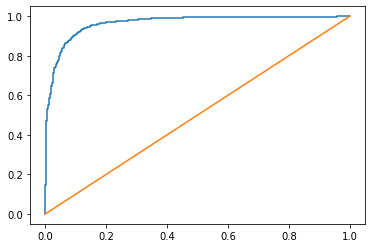

In [78]:
# plottinig the graph 
plt.plot(fpr,tpr,label='LogisticRegression')

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_te))]
p_fpr, p_tpr, _ = roc_curve(y_te, random_probs, pos_label=1)
plt.plot(p_fpr,p_tpr)

In [76]:
n_thresholds = len(np.unique(yprob[:,1])) + 1
print(n_thresholds)

2001


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


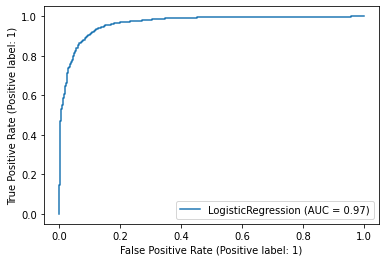

In [77]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve
# Plotting the curve using the plot_roc_curve
plot_roc_curve(lr,X_te,y_te)